In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats

Let's write a routine to compute the covariance between two variables. Remember, this is caluclated using: $\sigma_{xy} = {\sum (x_i-\bar x)(y_i- \bar y) \over n-1}$

In [2]:
def cov(x,y) :
    """Compute the covariance between two sets of values"""
    
    n=len(x)
    cov= sum((x-x.mean())*(y-y.mean()))/(n-1)     # code here
    return cov

If you were to make a 2D probability distribution function with independent variables, using a uniform distribution for each variable, what would you expect to get for the covariance? How about the full covariance matrix? What would you expect for a normal distribution?

<b>ANSWER HERE:</b>

For a joint uniform distribution for each variable, I would expect that the covariance would be close to 0. I would expect the variances to be greater for a uniform distribution since there might be more spread between the points.


For a normal or gaussian distribution, I think that I would get a covariance value not around 0 and the variances would be smaller than the uniform distribution.

In both cases, the covariance elements in the matrix should be the same, but the variance elements should be different.

--------------------------

Let's generate a 2D probabilty distribution function with uncorrelated variables, and use your routine to caculate the covariance. Let's compare it to the [numpy.cov()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) routine, which calculates the covariance matrix. How do the values compare with your expectation? How does the numpy routine calculate covariance by default (as compared to how it calculates variance)?

**Answer:**

These values are similar to what I thought they would be. For a uniform distribution, the covariance values are around 0, and the covariance elements are the same; however, the variance elements are different in the full symmetric matrix.  For a normal distribution, it seems as if the covariance tends to be larger than one calculated for a uniform distribution. The variances in x and y are  greater for the normal distribution than for the uniform distribution. For a uniform distribution,the (x,y) points are more distributed in comparision to a normal distribution where the points seem to be more clustered together.

Python's numpy version of covariance by default calculates the unbiased estimate. This is set by the "biased" keyword which is set to False meaning that the normalization is (N-1).

-----------


covariance:  0.00016287837991163412
numpy covariance matrix:
[[0.083439   0.00016288]
 [0.00016288 0.08232162]]


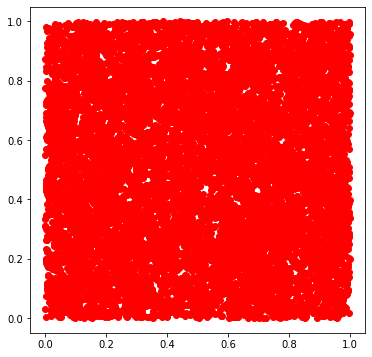

In [7]:
n=10000
# Generate a set of n randomly distributed points (uniform or gaussian)
x=  np.random.uniform(0,1,n)    # code here
# generate an independent set of randomly distributed points
y=   np.random.uniform(0,1,n)    # code here
# plot them in a square plot
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro')
# calculate and print the covariance. Compare with numpy.cov
c=cov(x,y)
print('covariance: ',c)
print('numpy covariance matrix:')
c_matrix=np.cov(x,y)
print(c_matrix)
if not np.isclose(c,c_matrix[0,1]) : print('Problem with covariance calculation?')


covariance:  0.011146740824300767
numpy covariance matrix:
[[0.99905749 0.01114674]
 [0.01114674 1.00149824]]


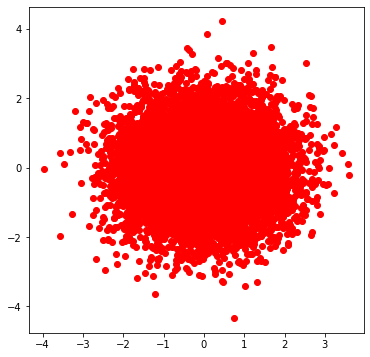

In [6]:
n=10000
# Generate a set of n randomly distributed points (uniform or gaussian)
x=  np.random.normal(0,1,n)    # code here
# generate an independent set of randomly distributed points
y=   np.random.normal(0,1,n)    # code here
# plot them in a square plot
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro')


# calculate and print the covariance. Compare with numpy.cov
c=cov(x,y)
print('covariance: ',c)
print('numpy covariance matrix:')
c_matrix=np.cov(x,y)
print(c_matrix)


if not np.isclose(c,c_matrix[0,1]) : print('Problem with covariance calculation?')


Now let's generate a perfectly correlated (or anticorrelated) data set. What do you predict for the covariance matrix in this case, again, both for a uniform distribution and a normal distribution in the variables?

<b> ANSWER HERE: </b>

In this case, for a uniform distribution, I think that that if the variables are correlated, then we should see a positive linear relationship when plotting. This means that all of the elements of the covariance matrix will be positive and the same. If the two variables are uncorrelated, then we should see a negative linear relationship. So, the covariance matrix should exhibit all the same numbers, but they will be negative.

For a normal distribution, I think that we should expect to see similar relationships as in a uniform distribution.

------------------------

covariance:  0.08435799316885417
correlated covariance matrix:
[[0.08435799 0.08435799]
 [0.08435799 0.08435799]]
uncorrelated covariance matrix:
[[ 0.08435799 -0.08435799]
 [-0.08435799  0.08435799]]


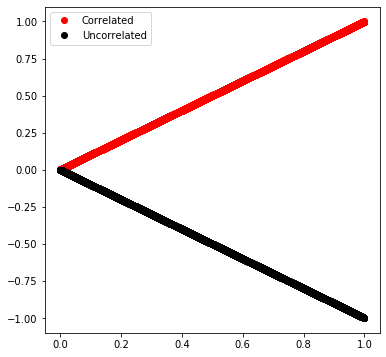

In [8]:
n=10000
# generate a randomly distributed data set in one variable
x=  np.random.uniform(0,1,n)     # code here
# set the other variable to be THE SAME (i.e., not an independent random sample), or THE SAME with opposite sign
y=  x     # code here
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro',label='Correlated')
plt.plot(x,-y,'ko',label='Uncorrelated')
plt.legend()
# calculate and print the covariance matrix
c=cov(x,y)
print('covariance: ',c)
c_matrix=np.cov(x,y)
print('correlated covariance matrix:')
print(c_matrix)

c_matrix2=np.cov(x,-y)
print('uncorrelated covariance matrix:')
print(c_matrix2)


covariance:  1.0198140581129693
correlated ovariance matrix:
[[1.01981406 1.01981406]
 [1.01981406 1.01981406]]
uncorrelated covariance matrix:
[[ 1.01981406 -1.01981406]
 [-1.01981406  1.01981406]]


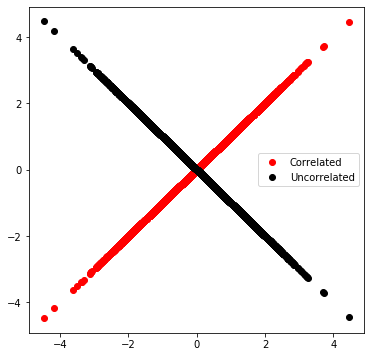

In [9]:
n=10000
# generate a randomly distributed data set in one variable
x=  np.random.normal(0,1,n)     # code here
# set the other variable to be THE SAME (i.e., not an independent random sample), or THE SAME with opposite sign
y=  x     # code here
plt.figure(figsize=(6,6))

plt.plot(x,y,'ro',label='Correlated')
plt.plot(x,-y,'ko',label='Uncorrelated')
plt.legend()
# calculate and print the covariance matrix
c=cov(x,y)
print('covariance: ',c)
c_matrix=np.cov(x,y)
print('correlated ovariance matrix:')
print(c_matrix)

c_matrix2=np.cov(x,-y)
print('uncorrelated covariance matrix:')
print(c_matrix2)


Now let's generate a correlated data set, but not with a perfect correlation. Do this by injecting some random noise on top of the underlying correlation.

covariance:  0.12248408564637307
covariance matrix:
[[0.09291775 0.12248409]
 [0.12248409 1.25435978]]


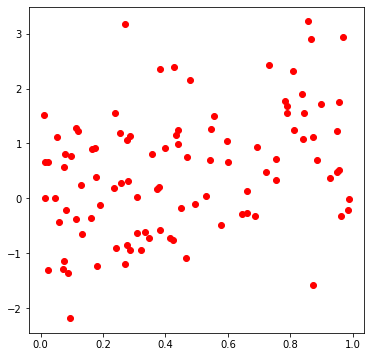

In [10]:
def get_correlated_sample(n,uniform=True,xmin=0,xmax=1,mean=0,sigma=1) :
    """Generated correlated sample data set"""
    if uniform :
        x=np.random.uniform(xmin,xmax,size=n)
    else :
        x=np.random.normal(mean,sigma,size=n)
    # make the other variable correlated, but add some random noise to one of the variables
    y=x + np.random.normal(0,1,size=n)    # code here
    return x,y

n=100
x,y=get_correlated_sample(n)
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro')

# calculate and print the covariance matrix
c=cov(x,y)
print('covariance: ',c)
c_matrix=np.cov(x,y)
print('covariance matrix:')
print(c_matrix)



How do you expect your results for the covariance matrices change if you changed the width of the underlying distributions, both for uniform and normally distributed variables?


<b>ANSWER HERE:</b>



For a uniform distribution, changing the width doesn't affect the overall distribution. However, for a normal distribution, increasing the width causes the width of the distribution when plotted to become smaller. For a normal distribution, increasing the width and changing the sample size, leads to a large covariance value. However, for a uniform distribution, doing this has no big impact on the covariance value. It is still less than 1. So, I think that for a uniform distribution, the covariance will be less than 1 if the mean is 1.

------------------------

Play around with your data sets, changing the widths and types (uniform and normal) of the underlying distributions to build up some intuition about the covariance matrix.

covariance:  0.09138268053254738
covariance matrix:
[[0.08364229 0.09138268]
 [0.09138268 1.06212584]]


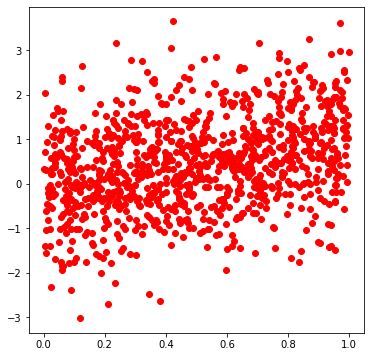

In [36]:
# uniform - changing sizes
def get_correlated_sample(n,uniform=True,xmin=0,xmax=1,mean=0,sigma=100) :
    """Generated correlated sample data set"""
    if uniform :
        x=np.random.uniform(xmin,xmax,size=n)
    else :
        x=np.random.normal(mean,sigma,size=n)
    # make the other variable correlated, but add some random noise to one of the variables
    y=x + np.random.normal(0,1,size=n)    # code here
    return x,y

n=1000
x,y=get_correlated_sample(n)
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro')

# calculate and print the covariance matrix
c=cov(x,y)
print('covariance: ',c)
c_matrix=np.cov(x,y)
print('covariance matrix:')
print(c_matrix)



covariance:  23.545304833735827
covariance matrix:
[[23.48781158 23.54530483]
 [23.54530483 24.5983321 ]]


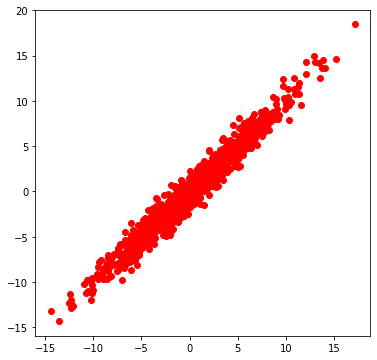

In [32]:
def get_correlated_sample(n,uniform=False,xmin=0,xmax=1,mean=0,sigma=5) :
    """Generated correlated sample data set"""
    if uniform :
        x=np.random.uniform(xmin,xmax,size=n)
    else :
        x=np.random.normal(mean,sigma,size=n)
    # make the other variable correlated, but add some random noise to one of the variables
    y=x + np.random.normal(0,1,size=n)    # code here
    return x,y

n=1000
x,y=get_correlated_sample(n)
plt.figure(figsize=(6,6))
plt.plot(x,y,'ro')

# calculate and print the covariance matrix
c=cov(x,y)
print('covariance: ',c)
c_matrix=np.cov(x,y)
print('covariance matrix:')
print(c_matrix)



OK, now let's work the other direction, i.e., given a covariance matrix, generate a multivariate distribution. For normal distributions, we can use the [numpy.random.multivariate_normal()](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html) routine. Play around with this for different values of the input means and covariance matrix:

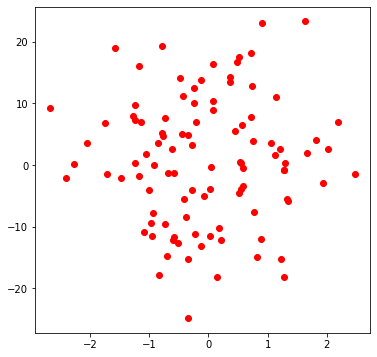

In [37]:
n=  100  # set value

# The desired mean values of the sample.
xmean= 0    # set value
ymean= 0   # set value
mu = np.array([xmean,ymean])

# The desired covariance matrix.
c00= 1
c01= 0
c10= 0
c11= 100
r = np.array([
        [  c00, c01 ],
        [  c10, c11]
            ])

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=n)
plt.figure(figsize=(6,6))
plt.plot(y[:,0],y[:,1],'ro')
plt.show()


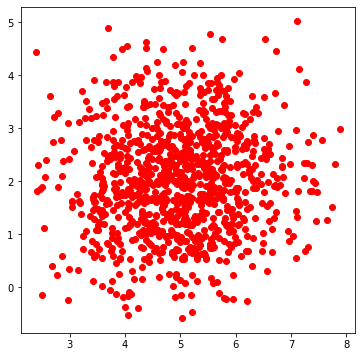

In [38]:
n=  1000  # set value

# The desired mean values of the sample.
xmean= 5   # set value
ymean= 2   # set value
mu = np.array([xmean,ymean])

# The desired covariance matrix.
c00= 1
c01= 0
c10= 0
c11= 1
r = np.array([
        [  c00, c01 ],
        [  c10, c11]
            ])

# Generate the random samples.
y = np.random.multivariate_normal(mu, r, size=n)
plt.figure(figsize=(6,6))
plt.plot(y[:,0],y[:,1],'ro')
plt.show()



OK, now let's work with quantifying correlation for distributions with arbitrary width, using the correlation coefficient, which is essentially a normalized covariance.

[scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) computes the (Pearson) correlation coeffient, and returns it plus the probability of getting the value given the number of points, given the null hypothesis. [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html) does the same thing for Spearman's correlation coefficient. Let's write a quick routine that calculates both for an input data set:

In [39]:
def corrcoef(x,y) :
    """ Compute Pearsons and Spearmans correlation coefficients and probabilities"""
    pearson_r, pearson_p = scipy.stats.pearsonr(x,y)  # code here
    spearman_r, spearman_p =  scipy.stats.spearmanr(x,y)  # code here
    print('Pearsons: ', pearson_r, pearson_p)
    print('Spearmans: ',spearman_r, spearman_p)
    
#corrcoef(x,y)

Experiment with generating sets of data with different covariance matrices and measuring the correlation coefficients

In [40]:
n=10000
# Generate a set of n randomly distributed points (uniform or gaussian)
x=  np.random.normal(0,1,n)    # code here
# generate an independent set of randomly distributed points
y=   np.random.normal(0,1,n)    # code here
c=cov(x,y)
c_matrix=np.cov(x,y)

corrcoef(x,y)

Pearsons:  -0.0027287822702695436 0.7849726560883918
Spearmans:  0.0023899890478998906 0.8111293343254091


In [41]:
n=10000
# Generate a set of n randomly distributed points (uniform or gaussian)
x=  np.random.uniform(0,1,n)    # code here
# generate an independent set of randomly distributed points
y=   np.random.uniform(0,1,n)    # code here
c=cov(x,y)
c_matrix=np.cov(x,y)

corrcoef(x,y)

Pearsons:  -0.005718174971890163 0.567490888082716
Spearmans:  -0.0057905302539053025 0.5625989617790619


In [43]:
n=10
# Generate a set of n randomly distributed points (uniform or gaussian)
x=  np.random.uniform(0,10,n)    # code here
# generate an independent set of randomly distributed points
y=   np.random.uniform(0,1,n)    # code here
c=cov(x,y)
c_matrix=np.cov(x,y)

corrcoef(x,y)

Pearsons:  -0.11512104715961746 0.7514836854802133
Spearmans:  0.1515151515151515 0.6760651759978538


What if we want to make a nonlinear relation? One way to accomplish this is to generate a random sample from a distribution of each x point, with some nonlinear relation. Play around with the relation and the scatter around it, and see the effect on the measured correlation coefficients.

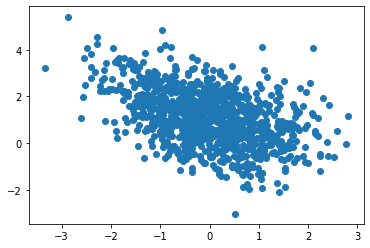

Pearsons:  -0.9418702114132103 0.0
Spearmans:  -1.0 0.0


In [44]:
n= 1000
x = np.random.normal(0,1,n)
y = np.exp(-x/2) 
y_non = y + np.random.normal(size=n)

plt.scatter(x,y_non)
plt.show()

corrcoef(x,y)

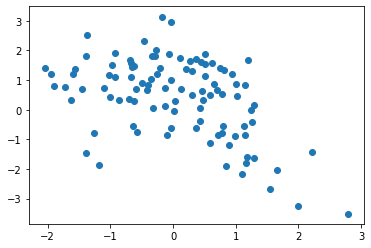

Pearsons:  -0.47740956285111336 5.106563826265794e-07
Spearmans:  -0.4086288628862886 2.4353879481958904e-05


In [45]:
n= 100
x = np.random.normal(0,1,n)
y = 4*np.sin(-x/6) + np.cos(x/1)
y_non = y + np.random.normal(size=n)

plt.scatter(x,y_non)
plt.show()

corrcoef(x,y_non)

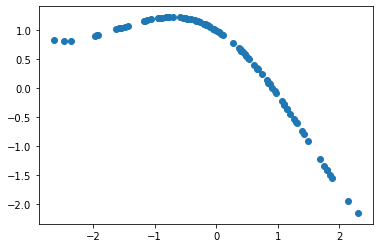

Pearsons:  -0.8056016941468411 5.214194165631954e-24
Spearmans:  -0.8141374137413742 7.204180742219618e-25


In [123]:
n= 100
x = np.random.normal(0,1,n)
y = 4*np.sin(-x/6) + np.cos(x/1)

plt.scatter(x,y)
plt.show()

corrcoef(x,y)

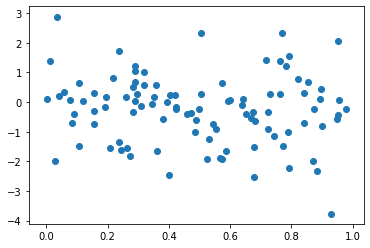

Pearsons:  -0.11374192833112523 0.25983539787814924
Spearmans:  -0.1032103210321032 0.30684759078581164


In [132]:
n= 100
x = np.random.uniform(0,1,n)
y = 4*np.sin(-x/6) 
y_non = y + np.random.normal(size=n)

plt.scatter(x,y_non)
plt.show()

corrcoef(x,y_non)

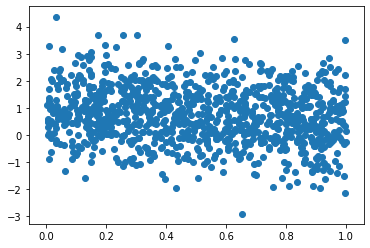

Pearsons:  -0.9979863334458847 0.0
Spearmans:  -1.0 0.0


In [119]:
n= 1000
x = np.random.uniform(0,1,n)
y = np.exp(-x/2) 
y_non = y + np.random.normal(size=n)

plt.scatter(x,y_non)
plt.show()

corrcoef(x,y)